## The top songs by year in the world by Spotify​ (2010-2019)

<img src="spotify.png">

The top songs BY YEAR in the world by spotify from 2010 to 2019. This dataset has several variables about the songs and is based on Billboard 100



Let's discover and clean the dataset

In [43]:
%pylab inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from wordcloud import WordCloud
import seaborn as sns
import plotly 
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


/home/abderrahmane/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



In [44]:
df = pd.read_csv('top10s.csv', encoding = "latin-1")
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [45]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [46]:
df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [47]:
#let's rename the columns first
df.rename(columns = {'top genre': 'top_genre'}, inplace=True)

In [48]:
#let's remove the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)


In [49]:
#Let's clean the data

In [50]:
df.dropna(subset=['year', 'artist','top_genre','title','bpm','nrgy','dnce','live','val','dur'])
df = df[df['bpm'] !=0]
df.head()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Now we can try to think about the interesting information and question we can try to anwser with this cleaned dataset 

What can be interesting as a final goal is to see what artist has been the best artist in the last decade by looking at the numbers

To do that the first thing can be to see what artist has created the most popular song in the last decade , it's an interesting indicator 


In [51]:
dftopartists = df.loc[df['pop'] > 85]
dftopartists.drop_duplicates(subset ="artist", 
                     keep = 'first', inplace = True) 



/home/abderrahmane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
dftopartists = dftopartists.sort_values(by='pop', ascending=False)
dftopartists.head()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93


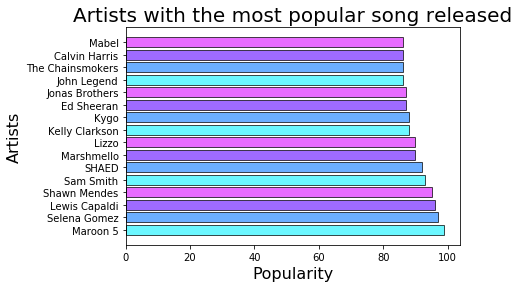

In [53]:

plt.barh(dftopartists['artist'],dftopartists['pop'], height=0.8,  color=('#2DF5FF', '#2D8CFF', '#762DFF', '#DF2DFF') ,edgecolor='black',alpha=0.7)
plt.title('Artists with the most popular song released',fontsize=20)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Popularity',fontsize=16)
rcParams['figure.figsize'] = 10,10



In [54]:
#  Another plot with Plotly to get a better result 
import plotly.express as px
fig = px.bar(dftopartists, x='artist', y='pop', color = 'pop')
fig.show()

We have our ranking of the artists that has created the most popular songs in the last decade. According to this ranking, Maroon 5 are the most popular artists. Neither LadyGaga nor Justin Bieber are in this ranking.

It's not enough, an artist can create one very popular song and find himself in the top of this ranking 

Let's look at the total number of song that artists has managed to place in the top 50

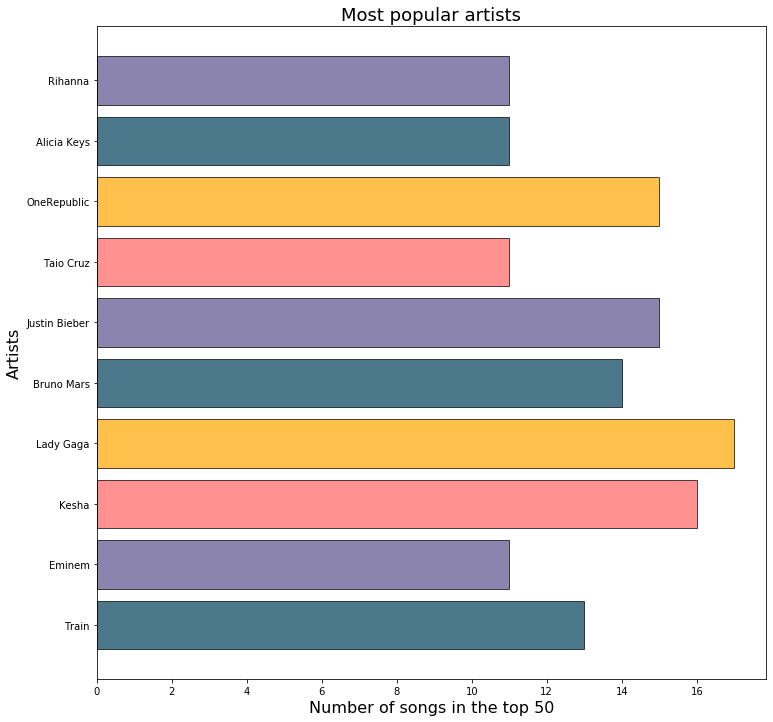

In [55]:
popular_artist=df.groupby('artist').size()
top_artist=popular_artist[popular_artist>10]
artist_list=df['artist'].values.tolist()
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(top_artist))
plt.barh(length,top_artist,color=('#003f5c', '#58508d', '#ff6361', '#ffa600') ,edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs in the top 50',fontsize=16)
plt.show()

The result of this ranking shows that the most popular artist is Lady Gaga. Justin bieber is at the 3rd place.

This ranking is more interesting, artists that has been able to place many songs in the top 50 are clearly the most inpressive. But we can do better. It is known by all artists and performers that the most difficult thing is the constance, to be able to create many popular songs. We have the number of songs but we don't have the distribution over time, it would add a really interesting information. Let's do it 

In [56]:
#Let's work with this top 10 
# We have : Lady Gaga, Kesha, OneRepublic, Justin Bieber  ....

In [57]:
dfGaga= df.loc[df['artist'] == 'Lady Gaga']


# We only need the year 


dfGaga = dfGaga[['year']]
dfGaga.head()





,year
3,2010
13,2010
18,2010
62,2011
76,2011


In [58]:
# We can now delete the duplicate years

dfGaga.drop_duplicates(subset ="year", 
                     keep = 'first', inplace = True) 

dfGaga.head()



,year
3,2010
62,2011
195,2013
243,2014
370,2016


In [59]:
# We can now calculate the indicator that would show the constancy of the artists over the years
#Sum of years should be a good indicator

y = 0
for index, row in dfGaga.iterrows():
    x = row['year']
    y = y + x 

    
print(y)

14099


In [60]:
#Let's do it for all the artists of the  top 10 
# We first need a list with the name of all the artists of the top 10

artist_list=df['artist'].values.tolist()
top_artist=popular_artist[popular_artist>10]


l0 = []
l1 = []
l2 = []


for i in range(0,4):
    c = top_artist[top_artist == 11 ].index[i]
    l0.append(c)

d = top_artist[top_artist == 15 ].index[1]
l1.append(d)


for i in range (12,18):
    
    
    try:
        b =  top_artist[top_artist == i].index[0]

        
        l2.append(b)
        
    except:
        b = 'null'
        

l3 = l0 + l1 + l2
l3




['Ed Sheeran',
 'Pitbull',
 'Shawn Mendes',
 'The Chainsmokers',
 'Rihanna',
 'Bruno Mars',
 'Lady Gaga',
 'Maroon 5',
 'Justin Bieber',
 'Katy Perry']

In [61]:
#Let's now create a dictionnary that will contain the constancy's score of all artists and their name 
y0 = 0; y1 = 0; y2 = 0; y3=0; y4 = 0; y5 = 0; y6 = 0; y7=0; y8 = 0; y9=0;

d = {}
    
    
dfEdSheeran = df.loc[df['artist'] == l3[0]]
dfEdSheeran = dfEdSheeran[['year']]
dfEdSheeran.drop_duplicates(subset ="year", 
                     keep = 'first', inplace = True) 
for index, row in dfEdSheeran.iterrows():
    x1 = row['year']
    y0 = y0 + x1
#d.update( {l3[0] : y0} )

                  
dfPitbull = df.loc[df['artist'] == l3[1]]
dfPitbull = dfPitbull[['year']]
dfPitbull.drop_duplicates(subset ="year", 
                     keep = 'first', inplace = True) 
for index, row in dfPitbull.iterrows():
    x2 = row['year']
    y1 = y1 + x2
#d.update( {l3[1] : y1} )
    
dfShawnMendes = df.loc[df['artist'] == l3[2]]
dfShawnMendes = dfShawnMendes[['year']]
for index, row in dfShawnMendes.iterrows():
    x3 = row['year']
    y2 = y2 + x3 
#d.update( {l3[2] : y2} )
    
dfTheChainsmokers = df.loc[df['artist'] == l3[3]]
dfTheChainsmokers = dfTheChainsmokers[['year']]
for index, row in dfTheChainsmokers.iterrows():
    x4 = row['year']
    y3 = y3 + x4 
d.update( {l3[3] : y3} )
    
dfRihanna = df.loc[df['artist'] == l3[4]]
dfRihanna = dfRihanna[['year']]
for index, row in dfRihanna.iterrows():
    x5 = row['year']
    y4 = y4 + x5 
d.update( {l3[4] : y4} )
    
dfBrunoMars = df.loc[df['artist'] == l3[5]]
dfBrunoMars = dfBrunoMars[['year']]
for index, row in dfBrunoMars.iterrows():
    x6 = row['year']
    y5 = y5 + x6 
d.update( {l3[5] : y5} )
    
dfLadyGaga = df.loc[df['artist'] == l3[6]]
dfLadyGaga = dfLadyGaga[['year']]
for index, row in dfLadyGaga.iterrows():
    x7 = row['year']
    y6 = y6 + x7 
d.update( {l3[6] : y6} )
    
dfMaroon5 = df.loc[df['artist'] == l3[7]]
dfMaroon5 = dfMaroon5[['year']]
for index, row in dfMaroon5.iterrows():
    x8 = row['year']
    y7 = y7 + x8 
d.update( {l3[7] : y7} )
    
dfJustinBieber = df.loc[df['artist'] == l3[8]]
dfJustinBieber = dfJustinBieber[['year']]
for index, row in dfJustinBieber.iterrows():
    x9 = row['year']
    y8 = y8 + x9 
d.update( {l3[8] : y8} )
        
dfKatyPerry = df.loc[df['artist'] == l3[9]]
dfKatyPerry = dfKatyPerry[['year']]
for index, row in dfKatyPerry.iterrows():
    x10 = row['year']
    y9 = y9 + x10 
d.update( {l3[9] : y9} )
    
    

d['Mars'] = d.pop('Bruno Mars')
d['LaGa'] = d.pop('Lady Gaga')
d['JB'] = d.pop('Justin Bieber')
d['KaPe'] = d.pop('Katy Perry')
d['Ma5'] = d.pop('Maroon 5')
d['TCS'] = d.pop('The Chainsmokers')

d

{'Rihanna': 30193,
 'Mars': 26171,
 'LaGa': 28179,
 'JB': 32232,
 'KaPe': 34226,
 'Ma5': 30221,
 'TCS': 22188}

We now have the dictionnary with the indicator
Let's plot it

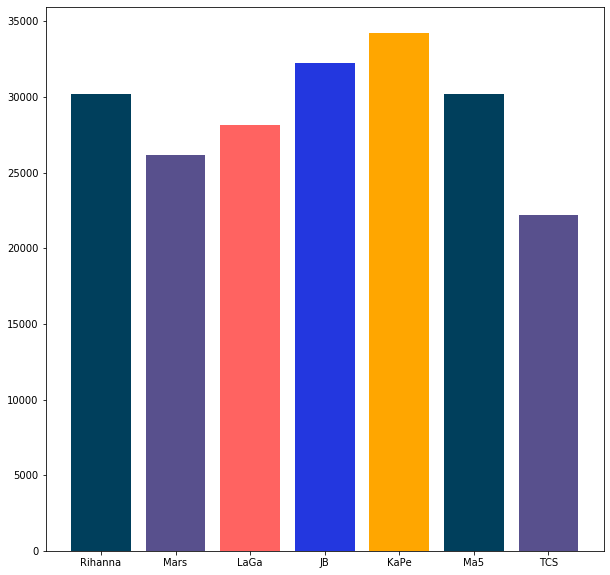

In [62]:
plt.bar(range(len(d)), list(d.values()), color = ('#003f5c', '#58508d', '#ff6361', '#2337DF', '#ffa600'), align='center')
plt.xticks(range(len(d)), list(d.keys()))

plt.show()

We have now a ranking of the artists with the best constancy. These artists has been able to place songs in the top 50 in many many different years. We now have Katy Perry as the top artists of the decade. Lady Gaga find herself at the 5th place and Justin Bieber at the 2nd place

Graph over time 

There is one last thing that we can do know to get the most accurate ranking, adding the popularity of the songs and the number of songs . We will have at the end a result that will take in account the constance and the popularity of the songs.

In [63]:
#Let's use only the top artists to delete the anomaly, the 'one song artists' 
dffiltered = df.loc[df['pop'] > 85]
dffiltered1 = df[df.duplicated(subset=['artist'], keep=False)]
dffiltered1.head()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77


Let's sum the popularity of all the songs of the artist. It will allow to measure the constance AND the popularity of the songs

In [64]:
df['Total'] = df.groupby(['artist'])['pop'].transform('sum')

In [65]:
new_df = df.drop_duplicates(subset=['artist'])

In [66]:
sorted_df = new_df.sort_values(by=['Total'])



In [67]:
sorted_df.drop('nrgy', axis=1, inplace=True)
sorted_df.drop('spch', axis=1, inplace=True)
sorted_df.drop('pop', axis=1, inplace=True)


In [68]:
sorted_df.tail()

,title,artist,top_genre,year,bpm,dnce,dB,live,val,dur,acous,Total
3,Bad Romance,Lady Gaga,dance pop,2010,119,70,-4,8,71,295,0,964
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,79,-4,7,61,235,13,981
28,Teenage Dream,Katy Perry,dance pop,2010,120,72,-5,13,59,228,2,1056
23,Misery,Maroon 5,pop,2010,103,70,-5,22,73,216,0,1123
5,Baby,Justin Bieber,canadian pop,2010,65,73,-5,11,54,214,4,1150


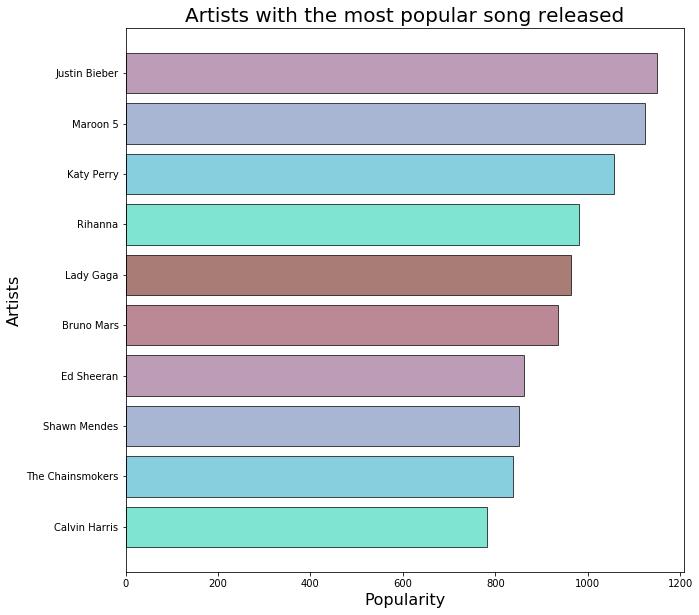

In [69]:
#We now have the sum that provide a good indicator of constancy and popularity, let's plot this
df_final = sorted_df.loc[sorted_df['Total'] > 700]
plt.barh(df_final['artist'],df_final['Total'], height=0.8,  color=('#49DAC0', '#54BBD0', '#8497C2', '#A1739A', '#9F5668', '#85463B'
) ,edgecolor='black',alpha=0.7)
plt.title('Artists with the most popular song released',fontsize=20)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Popularity',fontsize=16)
rcParams['figure.figsize'] = 10,10

Let's see the result of our final plot. Justin Bieber is the most popular artist of the last decade according to our ranking. He is followed by Maroon 5, Katy Perry, Rihanna and Lady Gaga. All these artists are artists that was on the last top ranking but not in the same position. This ranking is probably the most accurate one .

We have now finished with this ranking , but other interesting things can be done with this dataset...
Let's talk a little bit about the other columns that we have 

In [70]:
df.dtypes

title        object
artist       object
top_genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
Total         int64
dtype: object

Let's use Seaborn to visualise some information

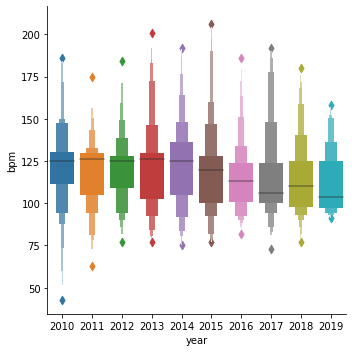

In [71]:
#Boxplot to see the evolution of the bpm over the years 

sns.catplot(y="bpm", x="year", kind="boxen", data=df)

---> Slower BPM over time 

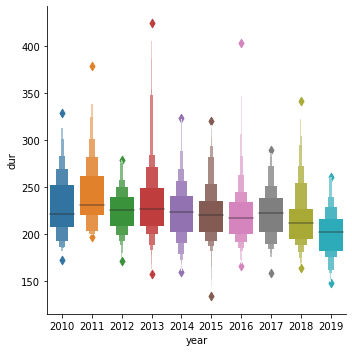

In [72]:
#Boxplot to see the evolution of the lenght of the songs over the years 

sns.catplot(y="dur", x="year", kind="boxen", data=df)

---> Shorter music over time 

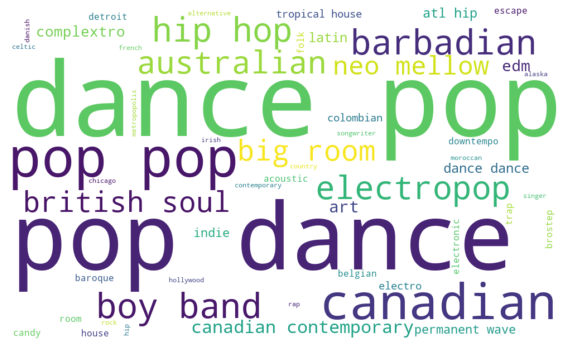

In [73]:
#Let's look at the different genre that we can see in the top charts, wordcloud can be a good tool to do that 

wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(df.top_genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



Let's use Manhattan plots . We can learn a lot of things from it. Don't forget that all the songs of the dataset
are all very popular so we already have one information without plotting it 

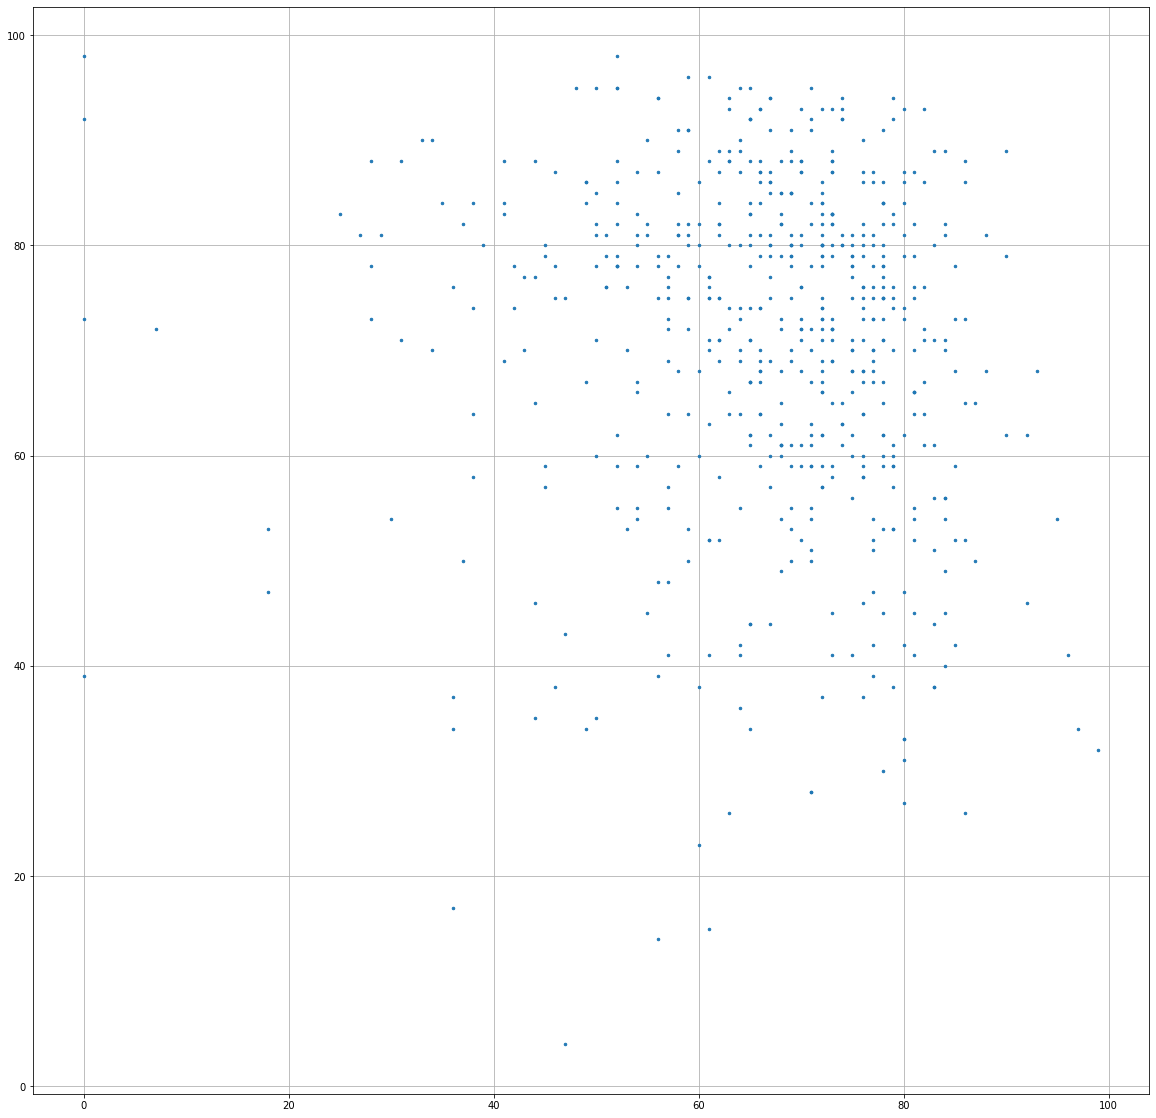

In [74]:
figure(figsize=(20, 20))
plot(df['pop'],df['nrgy'],'.', ms=5, alpha=5)
grid()

There are hardly any songs below 40 and most of the songs between 50 and 100.
CCL : Pretty much all the song of the dataset (popular songs) have a really high energy. People like energetics songs maybe to dance on it

One of the column is the bpm. BPM is Beat per Minute. With the bpm we can clearly see what type of music it is and see the evolution of type of music (slow music, dance music etc ...)
Let's try yo see the evolution of the music over the years

Text(0.5, 1, 'Beats Per Minute Vs Popularity in 2019')

<Figure size 864x864 with 0 Axes>

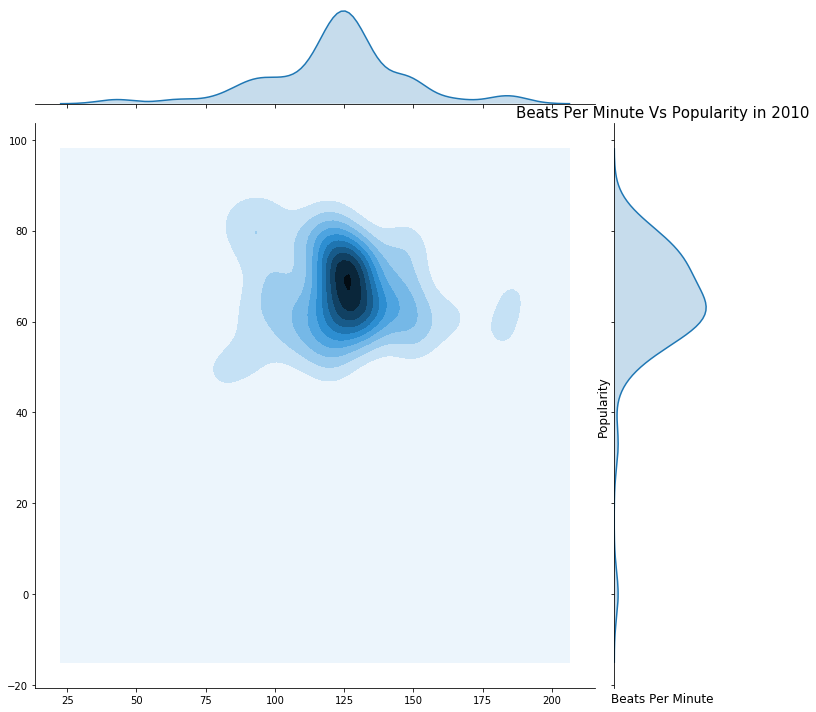

<Figure size 864x864 with 0 Axes>

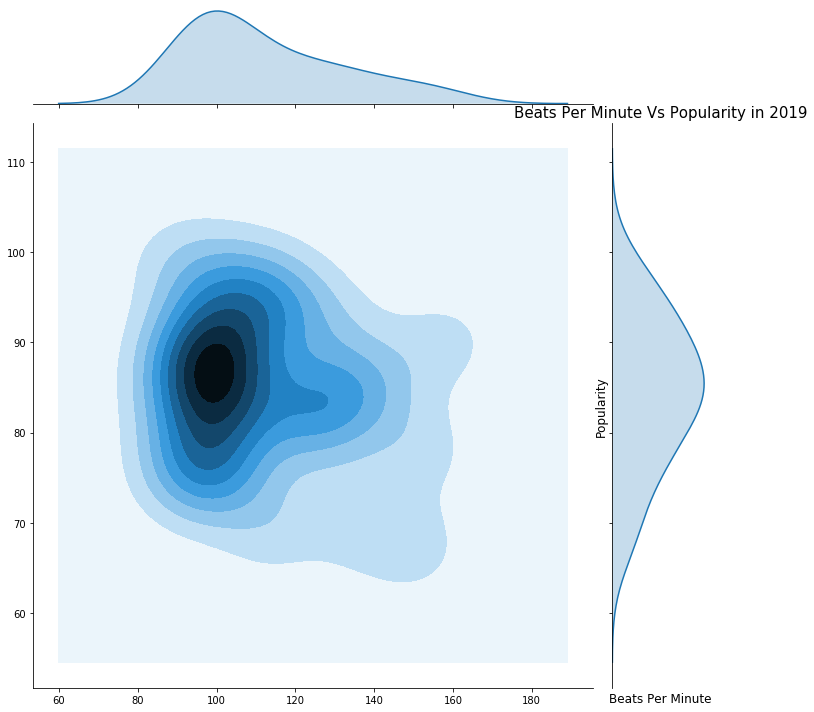

In [75]:
#Let's create dataframe for each year and plot density map with seaborn to see the evolution

df2010 = df.loc[df['year'] == 2010]
df2019 = df.loc[df['year'] == 2019]




plt.figure(figsize=(12,12))
sns.jointplot(x=df2010["bpm"].values, y=df2010['pop'].values, size=10, kind="kde",)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel("Beats Per Minute", fontsize=12)
plt.title("Beats Per Minute Vs Popularity in 2010", fontsize=15)


plt.figure(figsize=(12,12))
sns.jointplot(x=df2019["bpm"].values, y=df2019['pop'].values, size=10, kind="kde",)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel("Beats Per Minute", fontsize=12)
plt.title("Beats Per Minute Vs Popularity in 2019", fontsize=15)




We have a good idea of the evolution. Let's now plot the evolution each year as a gif to clearly see the evolution

In [76]:
from IPython.display import HTML
HTML('<img src="plot.gif">')

Very interesting evolution. The density is way more larger in 2019 than in 2010. There has been a real diversification of the genre over the years and people listen to a lots of different type of music nowadays with a lots of different bpm. It's something that music industry has noticed : every type of music can be represented in the top charts : Pop, Rap, House etc . Music indistry has really changed over the years thanks to internet and streaming platforms...